## Теоретическая вставка (повторение и обобщение)

### Метрики расстояния

Метрика L1 (манхэттенская метрика):

$$\rho(x, y) = \sum_{i=1}^{n}|x_{i}-y_{i}|$$

Метрика L2 (Евклидова метрика):

$$\rho(x, y) = \sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^{2}}$$

Обобщение метрик L1 и L2 - метрика Минковского:

$$\rho(x, y) = \left ( \sum_{i=1}^{n}|x_{i}-y_{i}|^{q} \right )^{\frac{1}{q}}.$$

Расстояние Чебышева:

$$\rho(x, y) = {\max_{i=1}^{n}|x_{i}-y_{i}}|$$

### Метрики близости

Косинусное расстояние:

$$\rho_{cos}(x, y) = 1 - \text{cos}\theta = 1 - \frac{\sum_{i=1}^{n}x_{i}y_{i}}{\sqrt{\sum_{i=1}^{n}x_{i}^{2}}\sqrt{\sum_{i=1}^{n}y_{i}^{2}}}.$$




Коэффициент Дайса:

$$\rho_{Dice}(x, y) =  2 * \frac{\sum_{i=1}^{n}x_{i}y_{i}}{{\sum_{i=1}^{n}x_{i}^{2}}+{\sum_{i=1}^{n}y_{i}^{2}}}.$$


### Основные методы оценки качества кластеризации


Внутрикластерное расстояние:
$$\sum_{k=1}^{K}\sum_{i=1}^{l}[a(x_{i})=k]\rho(x_{i}, c_{k}),$$ где $K$ - количество кластеров, $c_{k}$ - центр кластера. Задача алгоритма постороить кластеры с минимальным внутрикластерным расстоянием, так как в идеальном случае все объекты в одном кластере одинаковы, и расстояние между ними равно нулю.


Межкластерное расстояние: $$\sum_{i,j=1}^{l}[a(x_{i}) \neq a(x_{j})]\rho(x_{i}, x_{j}).$$ В данном случае, наоборот нужно максимизировать расстояние, так как объекты из разных кластеров должны максимально различаться, то есть иметь максимальное расстояние между собой.

## Практика

### Решение задачи кластеризации с помощью K-means

In [6]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [27]:
X, y = datasets.load_iris(return_X_y=True)
x1 = X[:, :1]
x2 = X[:, 1:2]

x1 = np.concatenate(x1).ravel()
x2 = np.concatenate(x2).ravel()

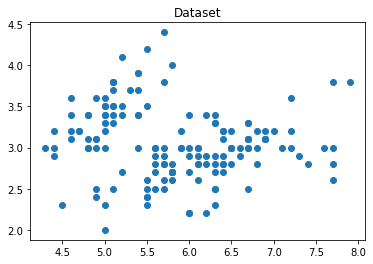

In [28]:
plt.plot()
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [36]:
X = np.array(list(zip(x1, x2)))

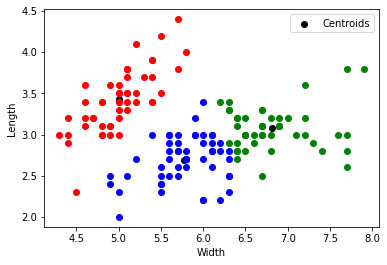

In [42]:
plt.plot()

kmeans = KMeans(n_clusters= 3).fit(X)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')

colors = ['b', 'g', 'r']
for i, l in enumerate(kmeans.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker="o")
    
    
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.show()

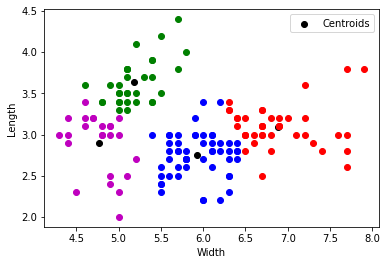

In [43]:
plt.plot()

kmeans = KMeans(n_clusters=4).fit(X)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')

colors = ['b', 'g', 'r', 'm']
for i, l in enumerate(kmeans.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker="o")
    
    
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.show()

### Самостоятельный кейс №3

Сравнить метки (цвета) полученные в рамках обучения модели с разным количеством кластеров и определить оптимальное число кластеров